In [ ]:
from google.colab import files

uploaded = files.upload()

# Assuming you've uploaded a single ZIP file, get its filename.
zip_file_name = next(iter(uploaded.keys()))
print(f"Uploaded file: {zip_file_name}")


In [ ]:
!unzip "$zip_file_name" -d "/content/unzipped_contents/"


Archive:  archive (6).zip
  inflating: /content/unzipped_contents/Books.csv  
  inflating: /content/unzipped_contents/DeepRec.png  
  inflating: /content/unzipped_contents/Ratings.csv  
  inflating: /content/unzipped_contents/Users.csv  
  inflating: /content/unzipped_contents/classicRec.png  
  inflating: /content/unzipped_contents/recsys_taxonomy2.png  


In [ ]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse import csr_matrix

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
books_df = pd.read_csv("/content/drive/MyDrive/RecSys/Books.csv")

<ipython-input-5-0f93050cf5cb>:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books_df = pd.read_csv("/content/drive/MyDrive/RecSys/Books.csv")


In [ ]:
books_df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [ ]:
rating_df = pd.read_csv("/content/drive/MyDrive/RecSys/Ratings.csv")

In [ ]:
rating_df.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [ ]:
merged_df = pd.merge(books_df[['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher', 'Image-URL-S', 'Image-URL-M', 'Image-URL-L']], rating_df, on='ISBN', how='inner')[['User-ID', 'ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher', 'Image-URL-S', 'Image-URL-M', 'Image-URL-L', 'Book-Rating']]

merged_df.head(), merged_df.shape

(   User-ID        ISBN           Book-Title           Book-Author  \
 0        2  0195153448  Classical Mythology    Mark P. O. Morford   
 1        8  0002005018         Clara Callan  Richard Bruce Wright   
 2    11400  0002005018         Clara Callan  Richard Bruce Wright   
 3    11676  0002005018         Clara Callan  Richard Bruce Wright   
 4    41385  0002005018         Clara Callan  Richard Bruce Wright   
 
   Year-Of-Publication                Publisher  \
 0                2002  Oxford University Press   
 1                2001    HarperFlamingo Canada   
 2                2001    HarperFlamingo Canada   
 3                2001    HarperFlamingo Canada   
 4                2001    HarperFlamingo Canada   
 
                                          Image-URL-S  \
 0  http://images.amazon.com/images/P/0195153448.0...   
 1  http://images.amazon.com/images/P/0002005018.0...   
 2  http://images.amazon.com/images/P/0002005018.0...   
 3  http://images.amazon.com/images/P/0002

In [ ]:
merged_csv_path = '/content/drive/MyDrive/RecSys/merged_books_ratings.csv'
# merged_df.to_csv(merged_csv_path, index=False)

merged_csv_path

'/content/drive/MyDrive/RecSys/merged_books_ratings.csv'

In [ ]:
rating_df = pd.read_csv(merged_csv_path)

<ipython-input-11-eda9a4e816fd>:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  rating_df = pd.read_csv(merged_csv_path)


In [ ]:
rating_df.shape

(1031136, 10)

In [ ]:
rating_df.isnull().sum()

User-ID                0
ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            4
Book-Rating            0
dtype: int64

In [ ]:
rating_df = rating_df.dropna()

In [ ]:
rating_df.isnull().sum()

User-ID                0
ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
Image-URL-S            0
Image-URL-M            0
Image-URL-L            0
Book-Rating            0
dtype: int64

In [ ]:
rating_df.duplicated().sum()

0

In [ ]:
zero_ratings = rating_df['Book-Rating'].value_counts()[0]
zero_ratings

647291

In [ ]:
unique_users = rating_df['User-ID'].nunique()
unique_users

92106

In [ ]:
unique_books = rating_df['ISBN'].nunique()
unique_books

270145

In [ ]:
import matplotlib.pyplot as plt

ratings_distribution = rating_df['Book-Rating'].value_counts().sort_index()
ratings_distribution

0     647291
1       1481
2       2375
3       5118
4       7617
5      45355
6      31687
7      66401
8      91803
9      60776
10     71225
Name: Book-Rating, dtype: int64

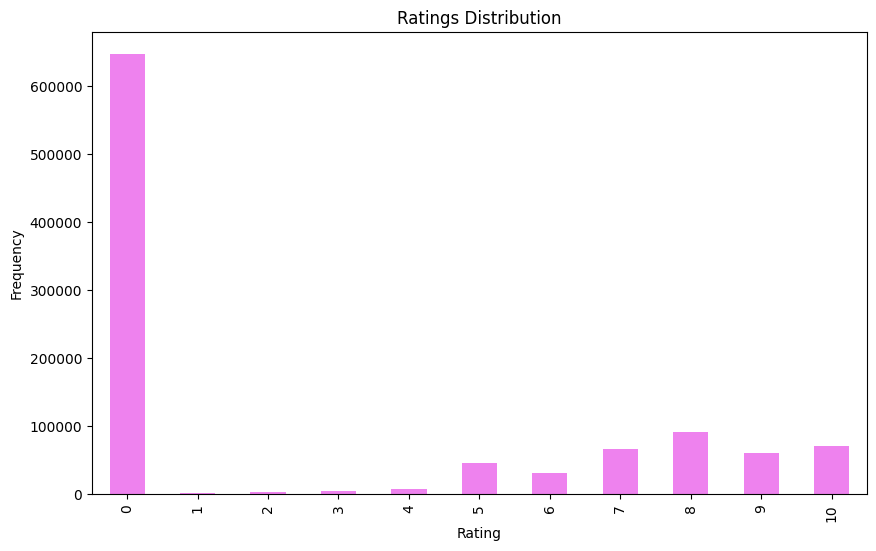

In [ ]:
plt.figure(figsize=(10, 6))
ratings_distribution.plot(kind='bar', color = 'violet')
plt.title('Ratings Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

In [ ]:
ratings_per_user = rating_df.groupby('User-ID')['Book-Rating'].count().sort_index()
ratings_per_user

User-ID
2          1
8         17
9          3
10         1
12         1
          ..
278846     1
278849     4
278851    23
278852     1
278854     8
Name: Book-Rating, Length: 92106, dtype: int64

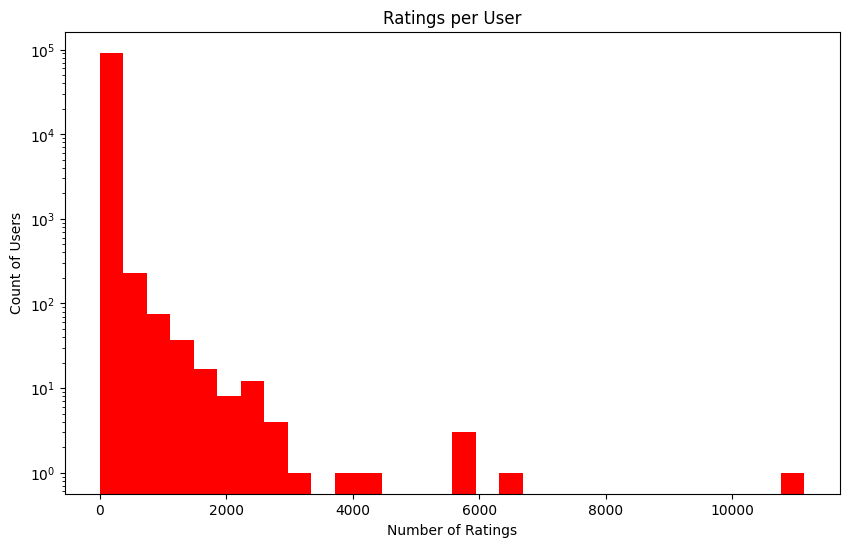

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(ratings_per_user.values, bins=30, log=True, color = 'red')
plt.title('Ratings per User')
plt.xlabel('Number of Ratings')
plt.ylabel('Count of Users')
plt.show()

In [ ]:
ratings_per_book = rating_df.groupby('ISBN')['Book-Rating'].count().sort_index()
ratings_per_book.head()

ISBN
0000913154    1
0001010565    2
0001046438    1
0001046713    1
000104687X    1
Name: Book-Rating, dtype: int64

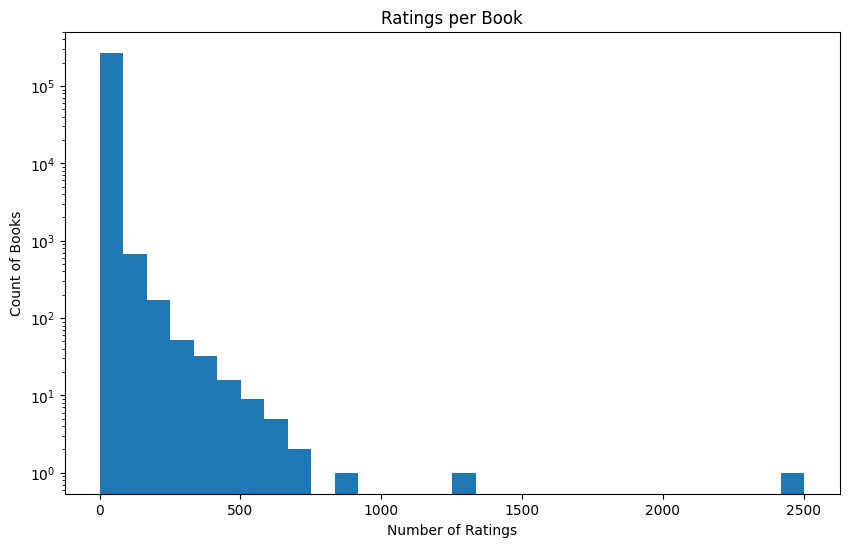

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(ratings_per_book.values, bins=30, log=True)
plt.title('Ratings per Book')
plt.xlabel('Number of Ratings')
plt.ylabel('Count of Books')
plt.show()

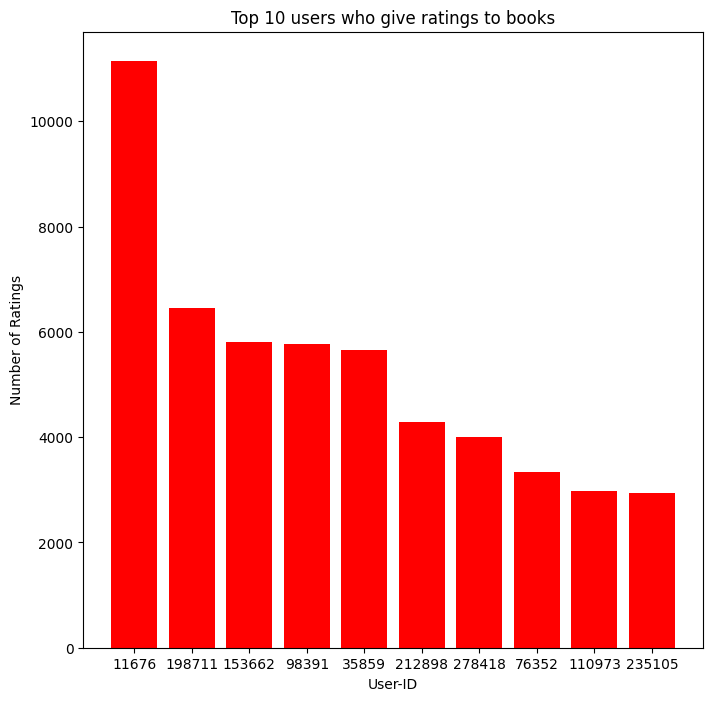

In [ ]:
u_r_counts = pd.DataFrame(rating_df['User-ID'].value_counts()).reset_index().head(10)
u_r_counts['index'] = u_r_counts['index'].astype(str)
plt.figure(figsize = (8,8))
plt.bar(x='index', height='User-ID', data=u_r_counts, color='red')
plt.xlabel('User-ID')
plt.ylabel('Number of Ratings')
plt.title('Top 10 users who give ratings to books')
plt.show()

In [ ]:
users_df = pd.read_csv("/content/drive/MyDrive/RecSys/Users.csv")

In [ ]:
users_df.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

Since this is a numeric column, we could fill the values with the average of the column, but that would lead to a majority of values with only 1 value, therefore we could add some variability to this, by assuming age is normally distributed around the mean. We can then take a range of one standard deviation below and above the mean and generate random values for the null cells.

In [ ]:
import numpy as np

std = np.floor(users_df['Age'].std())
mean_age = np.floor(users_df['Age'].mean())
print(std, mean_age)

14.0 34.0


In [ ]:
age_dist =  np.random.randint(mean_age-std, mean_age+std+1, users_df['Age'].isnull().sum())
users_df.loc[users_df['Age'].isna(), 'Age'] = age_dist
users_df.isna().sum()

User-ID     0
Location    0
Age         0
dtype: int64

In [ ]:
rated_users = users_df[users_df['User-ID'].isin(rating_df['User-ID'])]
rated_users.reset_index(inplace=True)
rated_users.head()

,index,User-ID,Location,Age
0,1,2,"stockton, california, usa",18.0
1,7,8,"timmins, ontario, canada",32.0
2,8,9,"germantown, tennessee, usa",41.0
3,9,10,"albacete, wisconsin, spain",26.0
4,11,12,"fort bragg, california, usa",28.0


In [ ]:
for i in rated_users.index:
  rated_users.loc[i, 'country'] = rated_users.loc[i, 'Location'].split(',')[-1].strip()

rated_users

<ipython-input-32-da8ab35d41fe>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rated_users.loc[i, 'country'] = rated_users.loc[i, 'Location'].split(',')[-1].strip()


,index,User-ID,Location,Age,country
0,1,2,"stockton, california, usa",18.0,usa
1,7,8,"timmins, ontario, canada",32.0,canada
2,8,9,"germantown, tennessee, usa",41.0,usa
3,9,10,"albacete, wisconsin, spain",26.0,spain
4,11,12,"fort bragg, california, usa",28.0,usa
...,...,...,...,...,...
92101,278845,278846,"toronto, ontario, canada",23.0,canada
92102,278848,278849,"georgetown, ontario, canada",23.0,canada
92103,278850,278851,"dallas, texas, usa",33.0,usa
92104,278851,278852,"brisbane, queensland, australia",32.0,australia


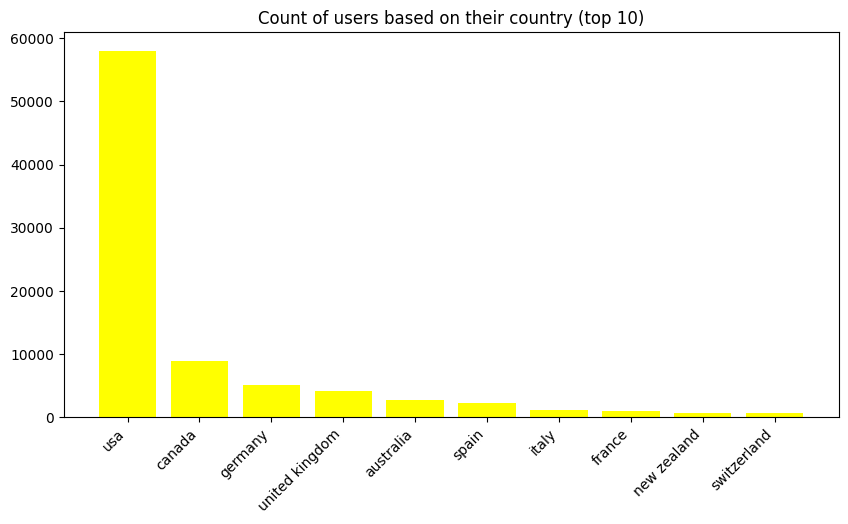

In [ ]:
countries = pd.DataFrame(rated_users['country'].value_counts()).reset_index().head(11)
countries['index'].replace('', np.nan, inplace=True)
countries.dropna(inplace=True)
plt.figure(figsize=(10,5))
plt.bar(x='index', height='country', data=countries, color = 'yellow')
plt.title('Count of users based on their country (top 10)')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
from scipy.sparse import csr_matrix

user_ids = rating_df['User-ID'].astype("category").cat.codes
item_ids = rating_df['ISBN'].astype("category").cat.codes
ratings = rating_df['Book-Rating']

user_item_matrix_sparse = csr_matrix((ratings, (user_ids, item_ids)), shape=(user_ids.max() + 1, item_ids.max() + 1))

print(user_item_matrix_sparse)


  (0, 24927)	0
  (1, 73)	5
  (1, 8175)	0
  (1, 59963)	0
  (1, 71447)	0
  (1, 77555)	0
  (1, 82278)	0
  (1, 141124)	0
  (1, 143074)	0
  (1, 157286)	5
  (1, 166205)	0
  (1, 176656)	0
  (1, 202760)	5
  (1, 218666)	5
  (1, 221772)	0
  (1, 227000)	6
  (1, 230854)	6
  (1, 241536)	7
  (2, 87241)	0
  (2, 103362)	6
  (2, 129457)	0
  (3, 236547)	0
  (4, 241114)	10
  (5, 9807)	5
  (5, 83699)	5
  :	:
  (92103, 88332)	5
  (92103, 115631)	0
  (92103, 118105)	0
  (92103, 136632)	7
  (92103, 156891)	0
  (92103, 165573)	5
  (92103, 171397)	5
  (92103, 190666)	7
  (92103, 201534)	7
  (92103, 205167)	5
  (92103, 207838)	7
  (92103, 208284)	8
  (92103, 221371)	8
  (92103, 226514)	0
  (92103, 228174)	10
  (92103, 242207)	7
  (92104, 97747)	8
  (92105, 37984)	7
  (92105, 61716)	7
  (92105, 81712)	7
  (92105, 81798)	7
  (92105, 107646)	0
  (92105, 118016)	6
  (92105, 121631)	0
  (92105, 121696)	8


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

user_similarity = cosine_similarity(user_item_matrix_sparse, dense_output=False)
item_similarity = cosine_similarity(user_item_matrix_sparse.T, dense_output=False)


In [ ]:
print(user_similarity)

  (1, 74675)	0.06598795479344474
  (1, 87044)	0.03784080109036774
  (1, 72126)	0.05898804727117089
  (1, 69462)	0.14823417800568506
  (1, 65830)	0.2852126942296184
  (1, 40854)	0.3363363969981562
  (1, 38623)	0.048873909204594515
  (1, 22455)	0.12655946698124634
  (1, 3629)	0.004234516427955321
  (1, 1)	0.9999999999999999
  (2, 89662)	0.14488189694993617
  (2, 89655)	0.5598925109558544
  (2, 89200)	0.23863697995167382
  (2, 87944)	0.17908612711114455
  (2, 87390)	0.14436106547701633
  (2, 85410)	0.27146264489895156
  (2, 84057)	0.27934688485989034
  (2, 83556)	0.3606678538669729
  (2, 82895)	0.4691574316284183
  (2, 82854)	0.2564682254550006
  (2, 79618)	0.3862269678805871
  (2, 79333)	0.11717917486340808
  (2, 79311)	0.8320502943378436
  (2, 76437)	0.43726946944662604
  (2, 73843)	0.10375027518676229
  :	:
  (92105, 24595)	0.05642226451917658
  (92105, 22832)	0.4068667356033675
  (92105, 22102)	0.12938336315540333
  (92105, 21524)	0.04348208197492612
  (92105, 21249)	0.197359356052110

In [ ]:
print(item_similarity)

  (0, 262466)	1.0
  (0, 261956)	1.0
  (0, 243726)	0.7682212795973759
  (0, 241197)	1.0
  (0, 240750)	0.3866945956182654
  (0, 239794)	0.375
  (0, 239674)	1.0
  (0, 239449)	1.0
  (0, 239059)	0.554700196225229
  (0, 238463)	1.0
  (0, 237969)	1.0
  (0, 237717)	0.21925149171034317
  (0, 237697)	1.0
  (0, 237691)	0.5832118435198043
  (0, 235747)	0.12469593727770992
  (0, 235667)	1.0
  (0, 234613)	1.0
  (0, 234234)	0.5185629788417315
  (0, 234228)	0.5261522196019802
  (0, 234227)	0.5734623443633283
  (0, 234164)	1.0
  (0, 233237)	1.0
  (0, 232885)	1.0
  (0, 232608)	1.0
  (0, 232251)	1.0
  :	:
  (270139, 11210)	0.1938736881594737
  (270139, 11151)	0.8320502943378436
  (270139, 10765)	0.423999152002544
  (270139, 10527)	0.4142242984627982
  (270139, 9794)	0.6246950475544243
  (270139, 9353)	0.48686449556014766
  (270139, 9332)	1.0
  (270139, 9319)	0.4437601569801833
  (270139, 9312)	0.5397841295136605
  (270139, 9296)	0.2656844656620286
  (270139, 9207)	0.4472135954999579
  (270139, 8436)	0.50

# **USER-USER COLABORATIVE FILTERING SYSTEM**

In [ ]:
# Convert ISBN to category and obtain category codes
rating_df['ISBN_code'] = rating_df['ISBN'].astype('category').cat.codes

# Create item mapping from indices to original ISBNs
item_mapping = dict(enumerate(rating_df['ISBN'].astype('category').cat.categories))

# Now, item_mapping is a dictionary where keys are numerical indices and values are the original ISBNs

def user_user_recommendations_sparse(user_id, user_similarity, user_item_matrix, item_mapping, top_n=5):
    # Ensure the user_item_matrix is in CSR format for efficient row querying
    if not isinstance(user_item_matrix, csr_matrix):
        user_item_matrix = csr_matrix(user_item_matrix)

    # Get the similarity scores for the target user directly from the sparse matrix
    similarity_scores = user_similarity.getrow(user_id).toarray().flatten()

    # Predict scores by multiplying the similarity scores with the user-item matrix
    pred_scores = user_item_matrix.T.dot(similarity_scores).flatten()

    # Get indices of already rated items to filter them out from recommendations
    rated_items = user_item_matrix.getrow(user_id).nonzero()[1]

    # Recommend items that the user hasn't rated yet
    recommendations = [(item, score) for item, score in enumerate(pred_scores) if item not in rated_items]

    # Sort the recommendations based on scores and return the top N
    recommendations.sort(key=lambda x: x[1], reverse=True)

    # Map indices to original ISBN numbers
    recommended_isbns = [item_mapping[item] for item, score in recommendations[:top_n]]

    return recommended_isbns

user_recommendations = user_user_recommendations_sparse(10, user_similarity, user_item_matrix_sparse,item_mapping, top_n=5)
print(user_recommendations)


['0000913154', '0001010565', '0001046438', '0001046713', '000104687X']


In [ ]:
ratings_filtered_df = rating_df[['User-ID', 'ISBN', 'Book-Rating']]

ratings_filtered_df.head(), ratings_filtered_df.shape

(   User-ID        ISBN  Book-Rating
 0        2  0195153448            0
 1        8  0002005018            5
 2    11400  0002005018            0
 3    11676  0002005018            8
 4    41385  0002005018            0,
 (1031129, 3))

In [ ]:
import numpy as np

def train_test_split(ratings, test_size=0.2):
    np.random.seed(42)

    # Create a mask of the same size as the ratings dataset, initially set to False
    test_mask = np.zeros(len(ratings), dtype=bool)

    # For each user, randomly select test_size percentage of ratings to be included in the test set
    for user_id in ratings['User-ID'].unique():
        user_ratings = ratings[ratings['User-ID'] == user_id]
        test_indices = np.random.choice(user_ratings.index, size=int(len(user_ratings) * test_size), replace=False)
        test_mask[test_indices] = True

    # Split the dataset
    test_ratings = ratings[test_mask]
    train_ratings = ratings[~test_mask]

    return train_ratings, test_ratings

train_df, test_df = train_test_split(ratings_filtered_df, test_size=0.2)

train_df.head(), test_df.head(), train_df.shape, test_df.shape


(   User-ID        ISBN  Book-Rating
 0        2  0195153448            0
 4    41385  0002005018            0
 5    67544  0002005018            8
 6    85526  0002005018            0
 7    96054  0002005018            0,
     User-ID        ISBN  Book-Rating
 1         8  0002005018            5
 2     11400  0002005018            0
 3     11676  0002005018            8
 10   177458  0002005018            0
 15        8  0060973129            0,
 (852952, 3),
 (178177, 3))

In [ ]:
# Create a sparse user-item matrix for the training set
# Map User-ID and ISBN to categorical codes to work with sparse matrix
user_ids = train_df['User-ID'].astype("category").cat.codes
isbn_codes = train_df['ISBN'].astype("category").cat.codes

train_matrix = csr_matrix((train_df['Book-Rating'], (user_ids, isbn_codes)))

users_similarity = cosine_similarity(train_matrix, dense_output=False)

In [ ]:
users_similarity.shape

(90762, 90762)

In [ ]:
user_mapping = dict(enumerate(train_df['User-ID'].astype("category").cat.categories))

In [ ]:
# Create item mapping from indices (categorical codes) to original ISBNs
item_mapping_train = dict(enumerate(train_df['ISBN'].astype('category').cat.categories))

In [ ]:
import numpy as np

def predict_user_rating(user_id, isbn, users_similarity, train_matrix, user_mapping, item_mapping):

    # Convert the user_id and isbn to indices in the matrix
    user_index = {v: k for k, v in user_mapping.items()}.get(user_id, None)
    item_index = {v: k for k, v in item_mapping.items()}.get(isbn, None)

    if user_index is None or item_index is None:
        return 0

    # Fetch the similarity scores row in sparse format
    similarity_scores = users_similarity[user_index]

    # Fetch the item ratings column in sparse format
    item_ratings = train_matrix.getcol(item_index)

    # Calculate the weighted sum of ratings
    weighted_sum = similarity_scores.multiply(item_ratings).sum()

    # Calculate the sum of similarity scores for users who have rated the item
    nonzero_similarity_scores = similarity_scores.multiply(item_ratings > 0)
    sum_similarity_scores = nonzero_similarity_scores.sum()

    if sum_similarity_scores > 0:
        predicted_rating = weighted_sum / sum_similarity_scores
    else:
        predicted_rating = 0

    return predicted_rating


In [ ]:
test_few = test_df.head(10000)

In [50]:
def predict_ratings_chunkwise(test_df, users_similarity, train_matrix, user_mapping, item_mapping, chunk_size=1000):
    all_predicted_ratings = []

    # Process the DataFrame in chunks
    for start in range(0, test_df.shape[0], chunk_size):
        end = start + chunk_size
        chunk = test_df.iloc[start:end]
        predicted_ratings = []

        for index, row in chunk.iterrows():
            user_id = row['User-ID']
            isbn = row['ISBN']
            predicted_rating = predict_user_rating(user_id, isbn, users_similarity, train_matrix, user_mapping, item_mapping)
            predicted_ratings.append(predicted_rating)

        all_predicted_ratings.extend(predicted_ratings)

    return all_predicted_ratings

predicted_ratings = predict_ratings_chunkwise(test_few, users_similarity, train_matrix, user_mapping, item_mapping_train, chunk_size=1000)
actual_ratings = test_few['Book-Rating'].tolist()

In [51]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

rmse = sqrt(mean_squared_error(actual_ratings, predicted_ratings))
print(f"RMSE: {rmse}")

mae = mean_absolute_error(actual_ratings, predicted_ratings)
print(f"MAE: {mae}")


RMSE: 6.069553281068029
MAE: 5.143116930674517


# **ITEM-ITEM COLABORATIVE FILTERING SYSTEM**


In [52]:
# Create a mapping from book titles to ISBNs
title_to_isbn_mapping = pd.Series(books_df['ISBN'].values, index=books_df['Book-Title']).to_dict()

In [53]:
isbn_to_index_mapping = {v: k for k, v in item_mapping.items()}

In [54]:
def item_item_recommendations_sparse_by_title(book_title, title_to_isbn_mapping, item_similarity, user_item_matrix, isbn_to_index_mapping, item_mapping, top_n=5):
    # Convert book title to ISBN
    isbn = title_to_isbn_mapping.get(book_title)
    if isbn is None:
        return []

    # Convert ISBN to item index
    item_index = isbn_to_index_mapping.get(isbn)
    if item_index is None:
        return []

    # Get the similarity scores for the target item directly from the sparse matrix
    similarity_scores = item_similarity.getcol(item_index).toarray().flatten()

    # Recommend items that are most similar
    recommendations = [(item, score) for item, score in enumerate(similarity_scores) if item != item_index]

    # Sort the recommendations based on scores and return the top N
    recommendations.sort(key=lambda x: x[1], reverse=True)

    # Map indices to original ISBN numbers
    recommended_isbns = [item_mapping[item] for item, score in recommendations[:top_n]]

    return recommended_isbns

In [55]:
example_title = 'Forms of Devotion: Stories and Pictures'
recommended_isbns = item_item_recommendations_sparse_by_title(
    example_title,
    title_to_isbn_mapping,
    item_similarity,
    user_item_matrix_sparse,
    isbn_to_index_mapping,
    item_mapping,
    top_n=5
)

print(f"Recommended items for book title '{example_title}': {recommended_isbns}")

Recommended items for book title 'Forms of Devotion: Stories and Pictures': ['0000913154', '0001010565', '0001046438', '0001046713', '000104687X']


In [56]:
import pickle

recommendation_functions = {
    'user_similarity': user_similarity,
    'item_similarity':item_similarity,
    'rating_df':rating_df,
    'top_n':5,
    'user_item_matrix_sparse':user_item_matrix_sparse,
    'item_mapping':item_mapping,
    'title_to_isbn_mapping':title_to_isbn_mapping,
    'isbn_to_index_mapping':isbn_to_index_mapping

}

with open("recommendation.pkl", "wb") as pickle_out:
    pickle.dump(recommendation_functions, pickle_out)

In [57]:
item_user_matrix = train_matrix.T

items_similarity = cosine_similarity(item_user_matrix, dense_output=False)

In [58]:
items_similarity.shape

(242539, 242539)

In [59]:
def predict_user_rating_item_item(user_id, isbn, items_similarity, item_user_matrix, user_mapping, item_mapping):
    user_index = {v: k for k, v in user_mapping.items()}.get(user_id, None)
    item_index = {v: k for k, v in item_mapping.items()}.get(isbn, None)

    if user_index is None or item_index is None:
        return 0

    # Get the similarity scores for the target item
    item_similarity_scores = items_similarity[item_index]

    # Get the ratings given by the target user
    user_ratings = item_user_matrix[:, user_index]

    # Calculate the weighted sum of ratings
    weighted_sum = item_similarity_scores.multiply(user_ratings).sum()

    # Calculate the sum of similarity scores for items rated by the user
    nonzero_similarity_scores = item_similarity_scores.multiply(user_ratings > 0)
    sum_similarity_scores = nonzero_similarity_scores.sum()

    if sum_similarity_scores > 0:
        predicted_rating = weighted_sum / sum_similarity_scores
    else:
        predicted_rating = 0

    return predicted_rating

In [60]:
def predict_ratings_chunkwise_item_item(test_df, items_similarity, item_user_matrix, user_mapping, item_mapping, chunk_size=1000):
    all_predicted_ratings = []

    for start in range(0, test_df.shape[0], chunk_size):
        end = start + chunk_size
        chunk = test_df.iloc[start:end]
        predicted_ratings = []

        for index, row in chunk.iterrows():
            user_id = row['User-ID']
            isbn = row['ISBN']
            predicted_rating = predict_user_rating_item_item(user_id, isbn, items_similarity, item_user_matrix, user_mapping, item_mapping)
            predicted_ratings.append(predicted_rating)

        all_predicted_ratings.extend(predicted_ratings)

    return all_predicted_ratings


predicted_ratings_item_item = predict_ratings_chunkwise_item_item(test_few, items_similarity, item_user_matrix, user_mapping, item_mapping_train, chunk_size=1000)
actual_ratings_item_item = test_df.head(10000)['Book-Rating'].tolist()


In [61]:
rmse_item_item = sqrt(mean_squared_error(actual_ratings_item_item, predicted_ratings_item_item))
print(f"Item-Item RMSE: {rmse_item_item}")

mae_item_item = mean_absolute_error(actual_ratings_item_item, predicted_ratings_item_item)
print(f"Item-Item MAE: {mae_item_item}")


Item-Item RMSE: 6.14767026124551
Item-Item MAE: 5.183524246693682


In [ ]:
import pickle
recommendation_functions = {
    'user_user_recommendations_sparse': user_user_recommendations_sparse,
    'item_item_recommendations_sparse': item_item_recommendations_sparse,
    'get_book_details':get_books_details,
}
with open("recommendation.pkl", "wb") as pickle_out:
    pickle.dump(recommendation_functions, pickle_out)

# **Popularity Based**


In [62]:
!pip install scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 6.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3162733 sha256=09411940fb22d7c13d6a25d4beff2c3f81a43622a5ba7fa65789283c02d2f73c
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [63]:
df = rating_df.copy()
df.dropna(inplace=True)
df.reset_index(drop=True,inplace=True)
# df.drop(columns=["ISBN","Year-Of-Publication","Image-URL-S","Image-URL-M"],axis=1,inplace=True)
df.drop(index=df[df["Book-Rating"]==0].index,inplace=True)

In [64]:
df

,User-ID,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Book-Rating,ISBN_code
1,8,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,5,73
3,11676,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,8,73
5,67544,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,8,73
8,116866,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,9,73
9,123629,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,9,73
...,...,...,...,...,...,...,...,...,...,...,...
1031116,275318,0395264707,Dreamsnake,Vonda N. McIntyre,1978,Houghton Mifflin,http://images.amazon.com/images/P/0395264707.0...,http://images.amazon.com/images/P/0395264707.0...,http://images.amazon.com/images/P/0395264707.0...,10,75732
1031121,275970,1845170423,Cocktail Classics,David Biggs,2004,Connaught,http://images.amazon.com/images/P/1845170423.0...,http://images.amazon.com/images/P/1845170423.0...,http://images.amazon.com/images/P/1845170423.0...,7,236929
1031123,276313,0449906736,Flashpoints: Promise and Peril in a New World,Robin Wright,1993,Ballantine Books,http://images.amazon.com/images/P/0449906736.0...,http://images.amazon.com/images/P/0449906736.0...,http://images.amazon.com/images/P/0449906736.0...,5,97709
1031124,276463,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,7,87631


In [65]:
df.drop(columns=['ISBN_code'], inplace=True)

In [71]:
def popular_books(df, n=10):
    rating_count = df.groupby("Book-Title").agg({'Book-Rating': 'count', 'Image-URL-L': 'first'}).reset_index()
    rating_count.rename(columns={"Book-Rating": "NumberOfVotes"}, inplace=True)

    rating_average = df.groupby("Book-Title").agg({'Book-Rating': 'mean'}).reset_index()
    rating_average.rename(columns={"Book-Rating": "AverageRatings"}, inplace=True)

    popularBooks = rating_count.merge(rating_average, on="Book-Title")

    def weighted_rate(x):
        v = x["NumberOfVotes"]
        R = x["AverageRatings"]
        return ((v * R) + (m * C)) / (v + m)

    C = popularBooks["AverageRatings"].mean()
    m = popularBooks["NumberOfVotes"].quantile(0.90)

    popularBooks = popularBooks[popularBooks["NumberOfVotes"] >= 250]
    popularBooks["Popularity"] = popularBooks.apply(weighted_rate, axis=1)
    popularBooks = popularBooks.sort_values(by="Popularity", ascending=False)
    return popularBooks[["Book-Title", "NumberOfVotes", "AverageRatings", "Popularity", "Image-URL-L"]].reset_index(drop=True).head(n)


In [67]:
n = 10
top_ten = pd.DataFrame(popular_books(df, n))

print("MOST POPULAR 10 BOOKS\n")
for i, row in top_ten.iterrows():
    book_title = row["Book-Title"]
    image = row["Image-URL-L"]
    average_rating = round(df[df["Book-Title"] == book_title]["Book-Rating"].mean(), 1)
    print(f"{i+1}. {book_title} - Rating: {average_rating} -Link:{image}")


<ipython-input-66-bea844151040>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popularBooks["Popularity"] = popularBooks.apply(weighted_rate, axis=1)


MOST POPULAR 10 BOOKS

1. Harry Potter and the Prisoner of Azkaban (Book 3) - Rating: 9.0 -Link:http://images.amazon.com/images/P/0439136350.01.LZZZZZZZ.jpg
2. To Kill a Mockingbird - Rating: 9.0 -Link:http://images.amazon.com/images/P/0446310786.01.LZZZZZZZ.jpg
3. Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback)) - Rating: 8.9 -Link:http://images.amazon.com/images/P/059035342X.01.LZZZZZZZ.jpg
4. Harry Potter and the Chamber of Secrets (Book 2) - Rating: 8.8 -Link:http://images.amazon.com/images/P/0439064872.01.LZZZZZZZ.jpg
5. Tuesdays with Morrie: An Old Man, a Young Man, and Life's Greatest Lesson - Rating: 8.6 -Link:http://images.amazon.com/images/P/0385484518.01.LZZZZZZZ.jpg
6. The Secret Life of Bees - Rating: 8.5 -Link:http://images.amazon.com/images/P/0142001740.01.LZZZZZZZ.jpg
7. The Da Vinci Code - Rating: 8.4 -Link:http://images.amazon.com/images/P/0385504209.01.LZZZZZZZ.jpg
8. The Lovely Bones: A Novel - Rating: 8.2 -Link:http://images.amazon.com/images/P/0316

# **MATRIX FACTORIZATION**

In [68]:
import pandas as pd
from surprise import Dataset, Reader, SVD, accuracy
from surprise.model_selection import train_test_split

def matrix_factorization_recommendation(df, user_id, n=10):

    reader = Reader(rating_scale=(1, 10))
    data = Dataset.load_from_df(df[['User-ID', 'Book-Title', 'Book-Rating']], reader)
    trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

    svd = SVD()
    svd.fit(trainset)

    test_predictions = svd.test(testset)

    rmse_mf = accuracy.rmse(test_predictions)
    mae_mf = accuracy.mae(test_predictions)

    user_unrated_books = df.loc[~df['Book-Title'].isin(df[df['User-ID'] == user_id]['Book-Title'].unique())]['Book-Title']

    user_testset = [(user_id, book_title, 0) for book_title in user_unrated_books]
    user_predictions = svd.test(user_testset)

    pred_df = pd.DataFrame(user_predictions, columns=['User-ID', 'Book-Title', 'Actual-Rating', 'Predicted-Rating', 'Details'])
    pred_df = pred_df.sort_values(by='Predicted-Rating', ascending=False)

    top_books = pred_df[['Book-Title', 'Predicted-Rating']].drop_duplicates().head(n)

    return top_books, rmse_mf, mae_mf


In [69]:
user_id_input = input("Enter a User-ID for personalized recommendations: ")
user_id_input = int(user_id_input)
top_books_user, rmse, mae = matrix_factorization_recommendation(df, user_id_input)
print(top_books_user)

Enter a User-ID for personalized recommendations: 8
RMSE: 1.6387
MAE:  1.2625
                                               Book-Title  Predicted-Rating
258534  Harry Potter and the Sorcerer's Stone (Harry P...          8.606620
83424   Harry Potter and the Prisoner of Azkaban (Book 3)          8.549656
88172        Harry Potter and the Goblet of Fire (Book 4)          8.534137
22766        Where the Sidewalk Ends : Poems and Drawings          8.404670
55206    Harry Potter and the Chamber of Secrets (Book 2)          8.396783
223407  The Return of the King (The Lord of the Rings,...          8.390714
123663     The Two Towers (The Lord of the Rings, Part 2)          8.371468
1485                       Seabiscuit: An American Legend          8.342550
101682                              84 Charing Cross Road          8.336691
236913                                      Lonesome Dove          8.333660


In [70]:
data = {
    "Model": ["User-User", "Item-Item", "Matrix Factorization"],
    "RMSE": [6.0696, 6.1477, 1.6377],
    "MAE": [5.1431, 5.1835, 1.2607]
}

comparison_df = pd.DataFrame(data)

print(comparison_df)

                  Model    RMSE     MAE
0             User-User  6.0696  5.1431
1             Item-Item  6.1477  5.1835
2  Matrix Factorization  1.6377  1.2607


**Insights**

**Lower RMSE and MAE:** The Matrix Factorization model has significantly lower RMSE (1.6377) and MAE (1.2607) values compared to both the User-User and Item-Item models. Lower RMSE and MAE values indicate that the model's predictions are closer to the actual ratings, demonstrating higher accuracy in predicting user preferences.

**Efficiency in Handling Sparse Data:** Collaborative filtering approaches, particularly User-User and Item-Item, can struggle with sparse datasets where many users have rated only a few items. Matrix Factorization techniques, however, are particularly adept at uncovering latent factors in the data, which helps them make more accurate predictions even when the available data is sparse.